In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [5]:
# import data
movies = pd.read_table("/Users/bellehuang/Downloads/STA4101/final_project/movies.txt")

In [6]:
# glimpse data
print(movies.head(10))

numeric_cols = ["Gross", "Tickets.Sold", "Year", "Rank"]
for c in numeric_cols:
    if c in movies.columns:
        movies[c] = pd.to_numeric(movies[c], errors="coerce")

# parse dates
if "Release.Date" in movies.columns:
    movies["Release.Date"] = pd.to_datetime(movies["Release.Date"], errors="coerce")

   Rank                                  Movie Release.Date       Distributor  \
0     1   Star Wars Ep. VII: The Force Awakens   12/18/2015       Walt Disney   
1     2                         Jurassic World    6/12/2015         Universal   
2     3            The Avengers: Age of Ultron     5/1/2015       Walt Disney   
3     4                             Inside Out    6/19/2015       Walt Disney   
4     5                              Furious 7     4/3/2015         Universal   
5     6                        American Sniper   12/25/2014      Warner Bros.   
6     7                                Minions    7/10/2015         Universal   
7     8  The Hunger Games: Mockingjay - Part 2   11/20/2015         Lionsgate   
8     9                            The Martian    10/2/2015  20th Century Fox   
9    10                             Cinderella    3/13/2015       Walt Disney   

               Genre   MPAA      Gross  Tickets.Sold  Year         Full.Genre  
0          Adventure  PG-13 

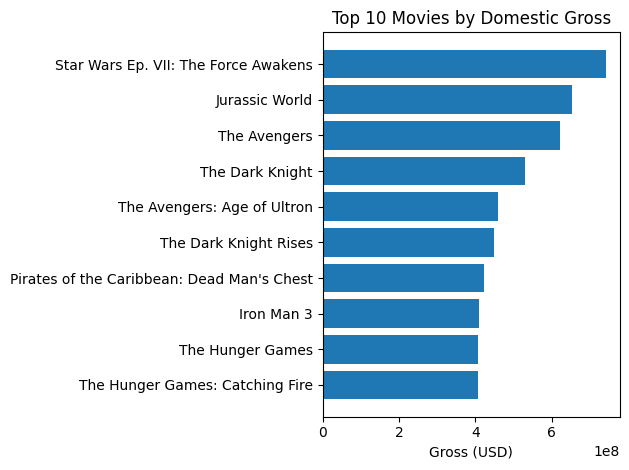

In [7]:
# Top 10 movies by Gross
top10 = movies.nlargest(10, "Gross")[["Movie", "Gross"]].iloc[::-1]  # reverse for horizontal plot order
plt.figure()
plt.barh(top10["Movie"], top10["Gross"])
plt.title("Top 10 Movies by Domestic Gross")
plt.xlabel("Gross (USD)")
plt.tight_layout()
plt.show()

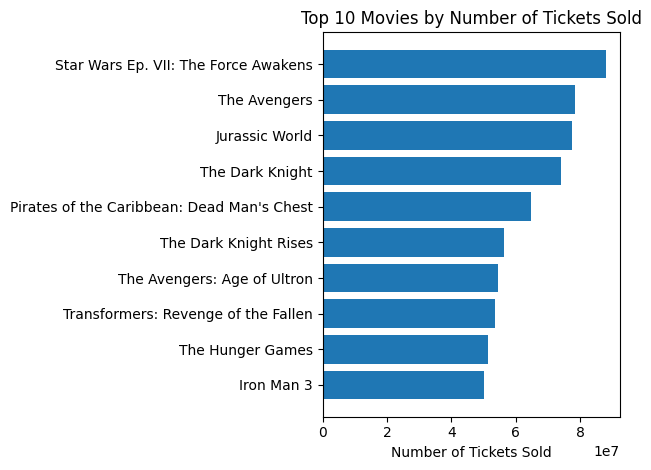

In [8]:
# Top 10 movies by Number of Tickets Sold
top10 = movies.nlargest(10, "Tickets.Sold")[["Movie", "Tickets.Sold"]].iloc[::-1]  # reverse for horizontal plot order
plt.figure()
plt.barh(top10["Movie"], top10["Tickets.Sold"])
plt.title("Top 10 Movies by Number of Tickets Sold")
plt.xlabel("Number of Tickets Sold")
plt.tight_layout()
plt.show()

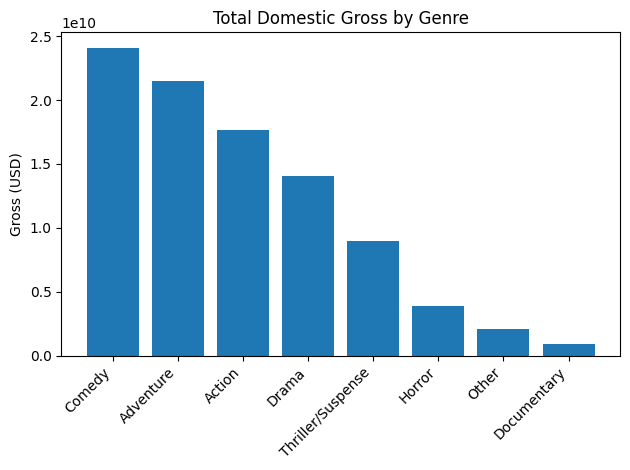

In [9]:
# Total Gross by Genre
if "Genre" in movies.columns:
    gross_by_genre = movies.groupby("Genre", as_index=False)["Gross"].sum().sort_values("Gross", ascending=False)
    plt.figure()
    plt.bar(gross_by_genre["Genre"], gross_by_genre["Gross"])
    plt.title("Total Domestic Gross by Genre")
    plt.ylabel("Gross (USD)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

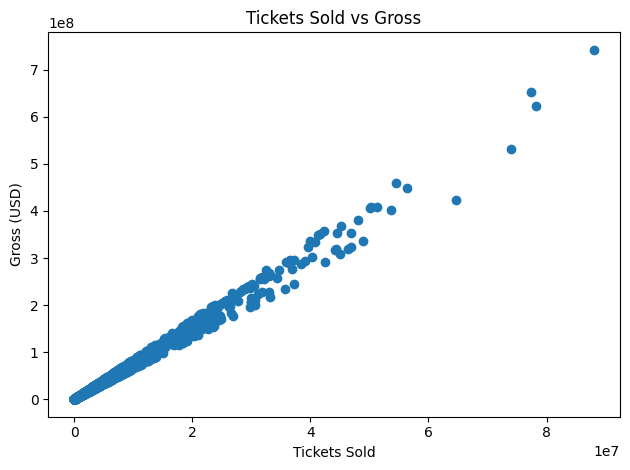

In [10]:
# Tickets Sold vs Gross
plt.figure()
plt.scatter(movies["Tickets.Sold"], movies["Gross"])
plt.title("Tickets Sold vs Gross")
plt.xlabel("Tickets Sold")
plt.ylabel("Gross (USD)")
plt.tight_layout()
plt.show()

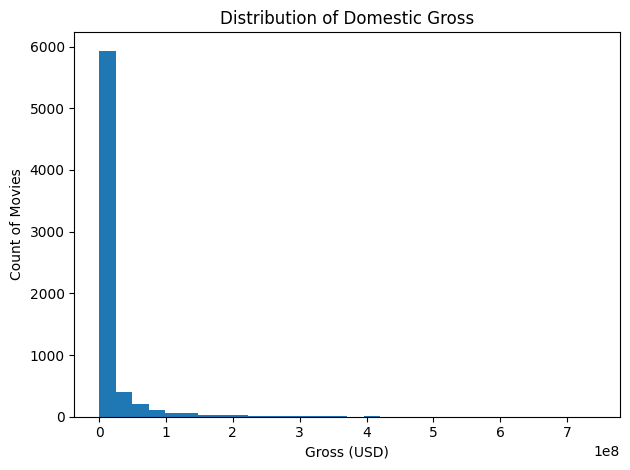

In [11]:
# Distribution of Gross
plt.figure()
plt.hist(movies["Gross"].dropna(), bins=30)
plt.title("Distribution of Domestic Gross")
plt.xlabel("Gross (USD)")
plt.ylabel("Count of Movies")
plt.tight_layout()
plt.show()

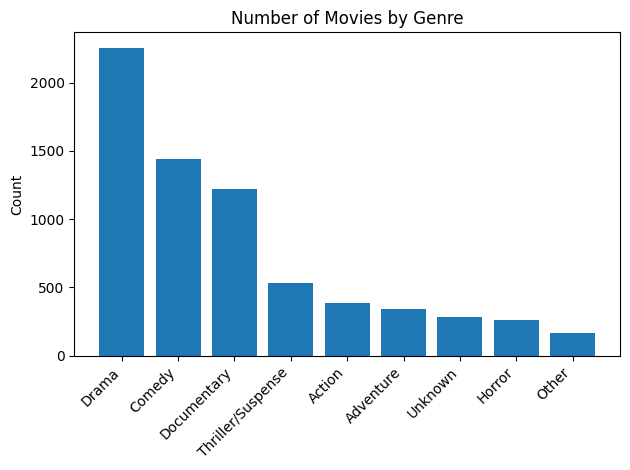

In [12]:
# Number of movies in each genre
counts = (
    movies["Genre"]
    .fillna("Unknown")
    .value_counts()
    .sort_values(ascending=False))

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Number of Movies by Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

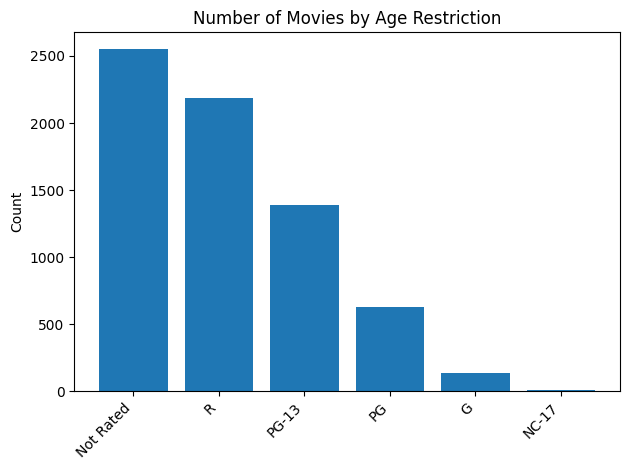

In [13]:
# Number of movies in each genre
counts = (
    movies["MPAA"]
    .fillna("Unknown")
    .value_counts()
    .sort_values(ascending=False))

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Number of Movies by Age Restriction")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

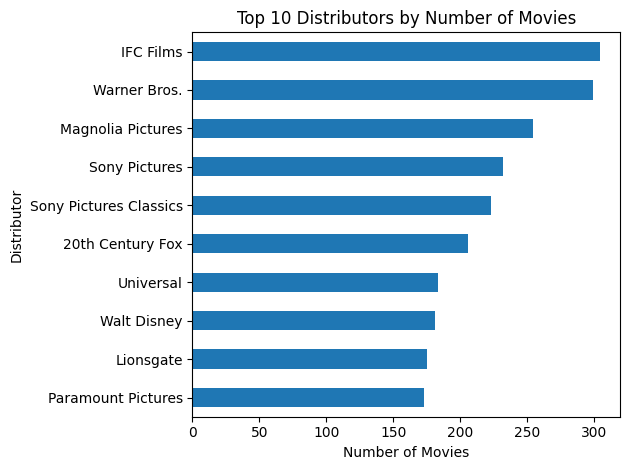

742208942 12 13512669.779759316
88043765 1 1772939.3458025227


In [14]:
# Top 10 Distributors
counts = (
    movies["Distributor"]
    .fillna("Unknown")
    .value_counts()
    .head(10)
)

# Plot (horizontal for readability)
plt.figure()
counts.sort_values(ascending=True).plot(kind="barh")
plt.title("Top 10 Distributors by Number of Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Distributor")
plt.tight_layout()
plt.show()

## Numerical Summaries
print(max(movies["Gross"]), min(movies["Gross"]), np.mean(movies["Gross"]))
print(max(movies["Tickets.Sold"]), min(movies["Tickets.Sold"]), np.mean(movies["Tickets.Sold"]))


In [15]:
## Data Cleaning

# remove N/A's if there are any
required_cols = ["Movie", "Tickets.Sold", "Year", "Distributor", "Genre", "MPAA", "Gross"]
movie = movies.dropna(subset=required_cols).reset_index(drop=True)

#remove duplicates if there are any
movie = movies.drop_duplicates(inplace=True)

# pick out frequent words and aggregate columns
titles = movies["Movie"].fillna("").str.lower()

# letters/numbers only, drop stopwords, count frequencies
tokens = titles.str.findall(r"[a-z0-9]+")
tokens = tokens.apply(lambda lst: [w for w in lst if w not in ENGLISH_STOP_WORDS and len(w) > 1])

freq = pd.Series([w for lst in tokens for w in lst]).value_counts()
top5 = freq.head(5).index.tolist()
print("Top 5 words:", top5)

# Add 5 binary predictors: 1 if word appears in title, else 0
for w in top5:
    col = f"title_has_{w}"
    movies[col] = titles.str.contains(fr"\b{re.escape(w)}\b", regex=True).astype(int)

# rename columns
movies.rename(columns={'Tickets.Sold': 'tickets_sold'}, inplace=True)
movies.rename(columns={'Release.Date': 'release_date'}, inplace=True)

# write csv
movies.to_csv('cleaned_movies.csv')

Top 5 words: ['man', 'love', 'life', '3d', 'story']
